In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
import warnings
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
warnings.filterwarnings('ignore')

In [3]:
metricas = {
    'Modelo':['Reg_Log','RandomForest','DecisionTree'],
    'Acuracia' : [], 
    'Precisão':[], 
    'Recall': [], 
    'F-score':[],
    'Tempo_Execução':[], 
    
}

In [4]:
def dados_metricas(metricas,y_test,y_pred,tmp_exc):
    for c, i in metricas.items():
        if c == 'Acuracia':
            i.append(accuracy_score(y_test,y_pred))
        elif c =='Precisão':
            i.append(precision_score(y_test,y_pred))
        elif c=='Recall':
            i.append(recall_score(y_test,y_pred))
        elif c=='F-score':
            i.append(f1_score(y_test,y_pred))
        elif c=='Tempo_Execução':
            i.append(tmp_exc)


In [5]:
df = pd.read_csv('creditcard_2023.csv')

In [6]:
df=df.drop(['id'],axis=1)

In [7]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [9]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train)

y = sc_X.fit_transform(np.array(y_train).reshape(-1,1))

#### Reg Logistica

In [10]:
#Trenamento do modelo para C = 10
start = time.time()
mod_rl= LogisticRegression(C=10).fit(X_train, y_train)
end = time.time()
tmp_exc_1 = end-start

In [11]:
y_pred_rl = mod_rl.predict(X_test)
print(classification_report(y_test,y_pred_rl)) 


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [12]:
dados_metricas(metricas,y_test,y_pred_rl,tmp_exc_1)

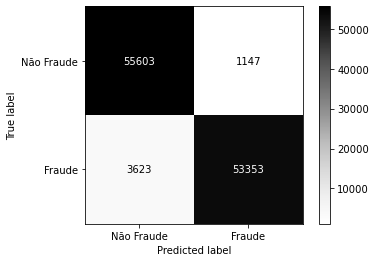

In [13]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rl),display_labels =['Não Fraude','Fraude']).plot(cmap="Greys")

plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test, mod_rl.predict_proba(X_test)[:, 1])

In [15]:
y_pred_treino = mod_rl.predict(X_train)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96    227565
           1       0.98      0.94      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904

******************** Matris de Confusão ********************


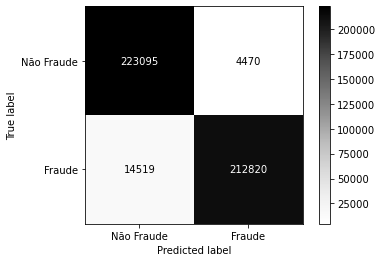

In [16]:
print(classification_report(y_train,y_pred_treino)) 

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino), display_labels =['Não Fraude','Fraude']).plot(cmap="Greys")

plt.show()

#### Random Forest

In [17]:

start = time.time()
mod_rf= RandomForestClassifier(criterion = 'entropy', max_depth = None, n_estimators = 100).fit(X_train, y_train)
end = time.time()
tmp_exc_2 = end-start

In [18]:
y_pred_rf = mod_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [19]:
dados_metricas(metricas,y_test,y_pred_rf,tmp_exc_2)

In [20]:
auc_rf = roc_auc_score(y_test, mod_rf.predict_proba(X_test)[:, 1])

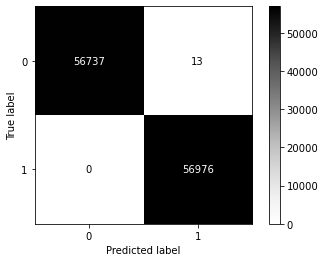

In [21]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf)).plot(cmap="Greys")

plt.show()

In [22]:
y_pred_treino_rf = mod_rf.predict(X_train)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    227565
           1       0.98      0.94      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904

******************** Matris de Confusão ********************


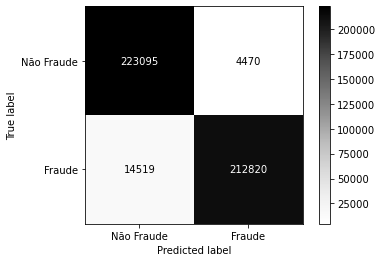

In [23]:
print(classification_report(y_train,y_pred_treino)) 

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino), display_labels =['Não Fraude','Fraude']).plot(cmap="Greys")

plt.show()

#### Decision Tree

In [24]:

start = time.time()
mod_dt= DecisionTreeClassifier(criterion = 'entropy', max_depth = 20).fit(X_train, y_train)
end = time.time()
tmp_exc_3 = end-start

In [25]:
y_pred_dt = mod_dt.predict(X_test)
print(classification_report(y_test,y_pred_dt)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [26]:
dados_metricas(metricas,y_test,y_pred_dt,tmp_exc_3)

In [27]:
auc_dt = roc_auc_score(y_test, mod_dt.predict_proba(X_test)[:, 1])

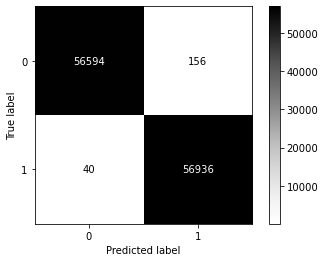

In [28]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt)).plot(cmap="Greys")

plt.show()

In [29]:
y_pred_treino_dt = mod_rf.predict(X_train)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    227565
           1       0.98      0.94      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904

******************** Matris de Confusão ********************


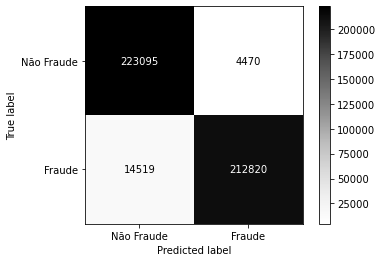

In [30]:
print(classification_report(y_train,y_pred_treino)) 

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino), display_labels =['Não Fraude','Fraude']).plot(cmap="Greys")

plt.show()

In [31]:
metricas

{'Modelo': ['Reg_Log', 'RandomForest', 'DecisionTree'],
 'Acuracia': [0.9580570845716898, 0.9998856901675958, 0.9982765594499059],
 'Precisão': [0.978954128440367, 0.9997718858025233, 0.9972675681356408],
 'Recall': [0.9364118225217636, 1.0, 0.999297950014041],
 'F-score': [0.9572105206501849, 0.999885929890756, 0.9982817266893431],
 'Tempo_Execução': [9.639021635055542, 1500.216429233551, 113.70582866668701]}

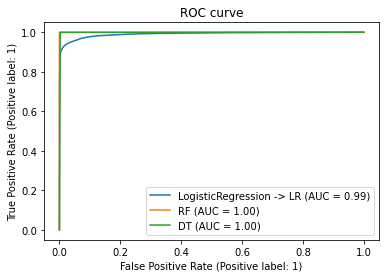

In [32]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("LogisticRegression -> LR", mod_rl),
    ("RF", mod_rf),
    ("DT", mod_dt),
   
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

In [33]:
auc = [auc_rf,auc_rf,auc_dt]

In [34]:
auc

[0.9999896433709781, 0.9999896433709781, 0.9984754383018679]

In [35]:
metricas.update({"AUC": auc})

In [36]:
metricas

{'Modelo': ['Reg_Log', 'RandomForest', 'DecisionTree'],
 'Acuracia': [0.9580570845716898, 0.9998856901675958, 0.9982765594499059],
 'Precisão': [0.978954128440367, 0.9997718858025233, 0.9972675681356408],
 'Recall': [0.9364118225217636, 1.0, 0.999297950014041],
 'F-score': [0.9572105206501849, 0.999885929890756, 0.9982817266893431],
 'Tempo_Execução': [9.639021635055542, 1500.216429233551, 113.70582866668701],
 'AUC': [0.9999896433709781, 0.9999896433709781, 0.9984754383018679]}

In [37]:
res = pd.DataFrame(metricas)

In [38]:
res.to_csv('Test5_modelos')

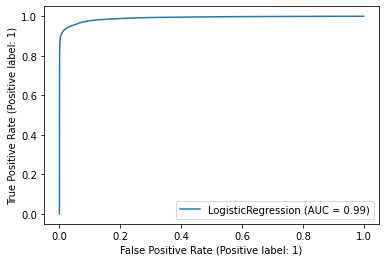

In [39]:
RocCurveDisplay.from_estimator(mod_rl, X_test, y_test)

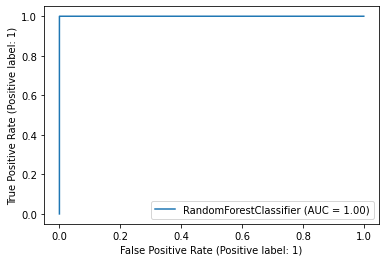

In [40]:
RocCurveDisplay.from_estimator(mod_rf, X_test, y_test)

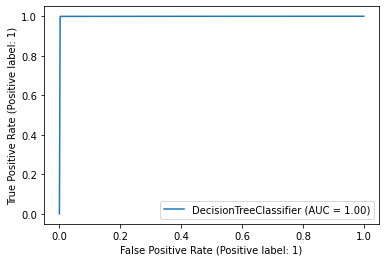

In [41]:
RocCurveDisplay.from_estimator(mod_dt, X_test, y_test)

In [42]:
from sklearn.metrics import (precision_recall_curve,
                              PrecisionRecallDisplay)

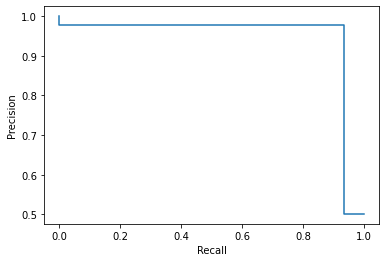

In [43]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_rl)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()